In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("PowerCut Data.csv")
print(df.shape)
df.head()

(9756, 13)


,MONTH,TYPE,CIRCLE,DIVISION,SUB_DIVISION,SAMPLE,POWEROFF_PREV,KWH_PREV,ESO_PREV,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE
0,202402,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),NaN,667,15.90,"4,05,181","9,171",16.57,"3,75,148","7,553",4.21%
1,202402,WC,DWK,2661,NaN,"2,662",3.87,"22,23,427","14,462",2.00,"23,93,594","8,334",-48.32%
2,202402,WC,JKP,2610,NaN,"8,241",3.05,"65,37,234","30,160",2.24,"69,55,959","22,258",-26.56%
3,202402,WC,"KHP, SVR, NFC",2511,NaN,704,3.41,"11,18,536","5,637",4.21,"11,74,879","7,763",23.46%
4,202402,WC,"KHP, SVR, NFC",2541,NaN,791,5.46,"12,37,871","10,682",3.78,"12,85,470","6,709",-30.77%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MONTH          9756 non-null   int64  
 1   TYPE           9756 non-null   object 
 2   CIRCLE         9684 non-null   object 
 3   DIVISION       8400 non-null   object 
 4   SUB_DIVISION   6528 non-null   object 
 5   SAMPLE         9756 non-null   object 
 6   POWEROFF_PREV  9756 non-null   float64
 7   KWH_PREV       9756 non-null   object 
 8   ESO_PREV       9756 non-null   object 
 9   POWEROFF_CURR  9756 non-null   float64
 10  KWH_CURR       9756 non-null   object 
 11  ESO_CURR       9756 non-null   object 
 12  PER_CHANGE     9756 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 991.0+ KB


In [4]:
df.isnull().sum()

MONTH               0
TYPE                0
CIRCLE             72
DIVISION         1356
SUB_DIVISION     3228
SAMPLE              0
POWEROFF_PREV       0
KWH_PREV            0
ESO_PREV            0
POWEROFF_CURR       0
KWH_CURR            0
ESO_CURR            0
PER_CHANGE          0
dtype: int64

In [5]:
df.describe()

,MONTH,POWEROFF_PREV,POWEROFF_CURR
count,9756.000000,9756.000000,9756.000000
mean,202381.561501,6.181121,5.725043
std,64.516196,6.410511,5.404626
min,202304.000000,0.060000,0.130000
25%,202310.000000,2.320000,2.230000
50%,202404.000000,3.895000,3.750000
75%,202410.000000,7.440000,7.210000
max,202503.000000,75.780000,55.370000


### Cleaning the data

In [6]:
# ➡️ Cleans the 'SAMPLE' column by removing commas and extra spaces from strings.
df['SAMPLE'] = df['SAMPLE'].str.replace(',', '').str.strip()
df.head()

,MONTH,TYPE,CIRCLE,DIVISION,SUB_DIVISION,SAMPLE,POWEROFF_PREV,KWH_PREV,ESO_PREV,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE
0,202402,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),NaN,667,15.90,"4,05,181","9,171",16.57,"3,75,148","7,553",4.21%
1,202402,WC,DWK,2661,NaN,2662,3.87,"22,23,427","14,462",2.00,"23,93,594","8,334",-48.32%
2,202402,WC,JKP,2610,NaN,8241,3.05,"65,37,234","30,160",2.24,"69,55,959","22,258",-26.56%
3,202402,WC,"KHP, SVR, NFC",2511,NaN,704,3.41,"11,18,536","5,637",4.21,"11,74,879","7,763",23.46%
4,202402,WC,"KHP, SVR, NFC",2541,NaN,791,5.46,"12,37,871","10,682",3.78,"12,85,470","6,709",-30.77%


In [7]:
# Fill missing values by SAMPLE (forward and backward)
df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())
df['SUB_DIVISION'] = df.groupby('SAMPLE')['SUB_DIVISION'].transform(lambda x: x.ffill().bfill())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5776\716469632.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5776\716469632.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SUB_DIVISION'] = df.groupby('SAMPLE')['SUB_DIVISION'].transform(lambda x: x.ffill().bfill())


In [8]:
df['DIVISION'] = df.groupby(['CIRCLE', 'TYPE', 'MONTH'])['DIVISION'].transform(lambda x: x.ffill().bfill())
df['SUB_DIVISION'] = df.groupby(['DIVISION', 'TYPE', 'MONTH'])['SUB_DIVISION'].transform(lambda x: x.ffill().bfill())

In [9]:
df.isnull().sum()

MONTH             0
TYPE              0
CIRCLE           72
DIVISION         72
SUB_DIVISION     72
SAMPLE            0
POWEROFF_PREV     0
KWH_PREV          0
ESO_PREV          0
POWEROFF_CURR     0
KWH_CURR          0
ESO_CURR          0
PER_CHANGE        0
dtype: int64

### Lent's check the value we filled is this is logical or wrong filling

In [10]:
df.groupby('SAMPLE')[['DIVISION', 'SUB_DIVISION']].nunique().sort_values(by='DIVISION', ascending=False)

,DIVISION,SUB_DIVISION
SAMPLE,,
115,10,9
55,10,9
56,9,10
52,9,9
121,8,8
...,...,...
1724342,0,0
1697134,0,0
1668547,0,0


In [11]:
filled_rows = df[df['DIVISION'].notnull()]
null_rows = df[df['DIVISION'].isnull()]


print(filled_rows['POWEROFF_CURR'].describe())
print()
print(null_rows['POWEROFF_CURR'].describe())
# We check whether rows with missing 'DIVISION' have different behavior (e.g., unusually high/low power cuts). 
# Through this we have a clarity that should we keep the rows or not

count    9684.000000
mean        5.733625
std         5.422315
min         0.130000
25%         2.220000
50%         3.730000
75%         7.260000
max        55.370000
Name: POWEROFF_CURR, dtype: float64

count    72.000000
mean      4.570833
std       1.463140
min       1.940000
25%       3.550000
50%       4.375000
75%       5.412500
max       9.810000
Name: POWEROFF_CURR, dtype: float64


In [12]:
df['DIVISION_WAS_FILLED'] = df['DIVISION'].isnull()
df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())
df['DIVISION_WAS_FILLED'] = df['DIVISION_WAS_FILLED'] & df['DIVISION'].notnull()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5776\575509116.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())


In [13]:
df[df['DIVISION_WAS_FILLED']].head()

,MONTH,TYPE,CIRCLE,DIVISION,SUB_DIVISION,SAMPLE,POWEROFF_PREV,KWH_PREV,ESO_PREV,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE,DIVISION_WAS_FILLED
5379,202411,LT,NaN,2610,NaN,8783,2.75,"5,22,55,529","2,30,159",2.74,"5,47,99,586","2,39,284",-.36%,True
6389,202409,LT,NaN,2610,NaN,8787,4.26,"7,55,78,781","4,68,480",5.54,"7,27,77,830","6,07,606",30.05%,True


In [14]:
df.dropna()
df = df[df['DIVISION'].notnull()]
df = df.dropna(subset=['CIRCLE'])

#### Drop Unuse Columns

In [15]:
df.drop(columns=['SAMPLE', 'DIVISION_WAS_FILLED', 'KWH_PREV', 'ESO_PREV', 'POWEROFF_PREV', 'SUB_DIVISION'], inplace=True)
print(df.shape)
df.head()

(9684, 8)


,MONTH,TYPE,CIRCLE,DIVISION,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE
0,202402,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),16.57,"3,75,148","7,553",4.21%
1,202402,WC,DWK,2661,2.00,"23,93,594","8,334",-48.32%
2,202402,WC,JKP,2610,2.24,"69,55,959","22,258",-26.56%
3,202402,WC,"KHP, SVR, NFC",2511,4.21,"11,74,879","7,763",23.46%
4,202402,WC,"KHP, SVR, NFC",2541,3.78,"12,85,470","6,709",-30.77%


In [16]:
# Convert Data type
df['MONTH'] = pd.to_datetime(df['MONTH'].astype(str), format='%Y%m')
# -----------------------------------------------------------------------
cols_to_clean = ['KWH_CURR', 'ESO_CURR']
for col in cols_to_clean:
    df[col] = df[col].str.replace(',', '', regex=True).astype(float)
# -------------------------------------------------------------------------
df['PER_CHANGE'] = df['PER_CHANGE'].str.replace('%', '', regex=False).astype(float)
# --------------------------------------------------------------------------

<h3 style = "color:yellow">1) How has the average power cut duration changed over time (monthly trend)?</h3>

In [25]:
monthly_avg = df.groupby(df['MONTH'])['POWEROFF_CURR'].mean()
monthly_avg

MONTH
2023-04-01    5.272407
2023-05-01    7.543697
2023-06-01    5.982407
2023-07-01    5.998561
2023-08-01    5.839628
2023-09-01    5.565484
2023-10-01    4.825856
2023-11-01    3.758809
2023-12-01    5.172705
2024-01-01    5.584789
2024-02-01    5.362779
2024-03-01    5.210447
2024-04-01    5.235792
2024-05-01    8.102228
2024-06-01    9.126064
2024-07-01    6.799406
2024-08-01    7.344604
2024-09-01    6.393465
2024-10-01    4.817970
2024-11-01    3.737921
2024-12-01    5.919777
2025-01-01    5.577550
2025-02-01    3.252500
2025-03-01    5.175495
Name: POWEROFF_CURR, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5776\3186836027.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


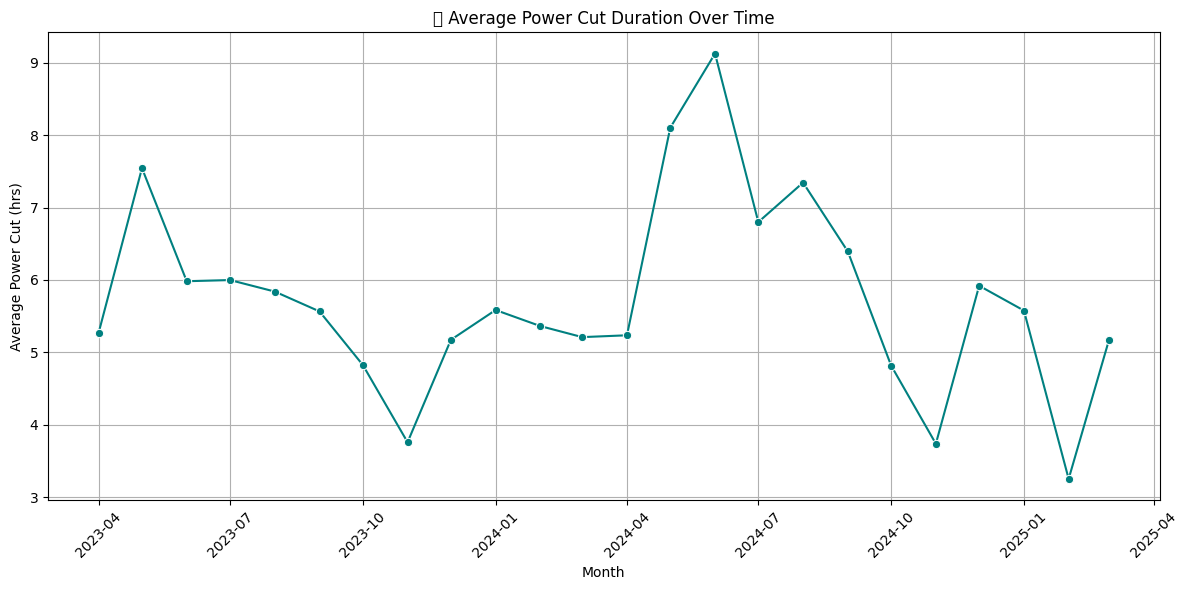

In [20]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, marker='o', color='teal')
plt.title('📉 Average Power Cut Duration Over Time')
plt.xlabel('Month')
plt.ylabel('Average Power Cut (hrs)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<h3 style = "color:yellow">2) Which months had the highest and lowest power cuts?</h3>

<h3 style = "color:yellow">3) Is there a seasonal pattern in power cuts (e.g., summer vs winter)?</h3>

<h3 style = "color:yellow">4) Which CIRCLE experiences the highest average power cuts?</h3>

<h3 style = "color:yellow">5) Which DIVISION has shown improvement or decline in power cuts (PER_CHANGE)?</h3>

<h3 style = "color:yellow">6) Map energy usage (KWH_CURR) by CIRCLE or DIVISION – who consumes the most?</h3>

<h3 style = "color:yellow">7) Compare 1PH vs 3PH meters – which has higher power cut duration?</h3>

<h3 style = "color:yellow">8) Is there a correlation between meter type and energy consumption?</h3>

<h3 style = "color:yellow">9) Is there a correlation between power cuts (POWEROFF_CURR) and energy consumption (KWH_CURR)?</h3>

<h3 style = "color:yellow">10) Does a higher number of engineers (ESO_CURR) result in lower power cuts?</h3>

<h3 style = "color:yellow">11) What’s the average PER_CHANGE in power cuts per division?</h3>